# Prototype Climate Impact Lab Interface

## Workspace Setup

Import some python modules

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import prototype

## Connect to the API

Authenticate with the [prototype] API, and define how you want to use the system

In [2]:
api = prototype.ClimateImpactLabDataAPI(
    username='mdelgado', 
    password='*********')

api.configure(sample='median', location='OSDC', priority='low')

API configuration updated


## Retrieve formatted Climate Impact Lab variables

In [3]:
# mortality regression parameters
alpha  = api.get_variable('alpha')
gamma1 = api.get_variable('gamma1')
gamma2 = api.get_variable('gamma2')
gamma3 = api.get_variable('gamma3')

# GCP-wide socioeconomic parameters
avg_days_per_bin = api.get_variable('avg_days_per_bin')
gdp_per_capita   = api.get_variable('gdppc')
pop_density      = api.get_variable('popdens')

# Climate variables
temp = api.get_variable('temp')

In [4]:
# Get variable attributes
temp.attrs

OrderedDict([('symbol', 'T'), ('description', 'NASA downscaled climate data')])

## Do math with Impact Lab variables

In [5]:
# From the NAS mortality presentation...

betahat = alpha+gamma1*avg_days_per_bin+gamma2*(gdp_per_capita.ln())+gamma3*(pop_density.ln())

In [6]:
# define how your new variable should look
betahat.symbol = '\\hat{{\\beta}}'

In [7]:
# show LaTeX for the math we just did
betahat.display()

<IPython.core.display.Latex object>

In [8]:
# Also, show the result of the calculation
betahat.value

<xarray.DataArray (bins: 12, adm2: 24999, time: 100)>
array([[[ 0.13070758,  0.27115357,  0.51208013, ...,  0.75042949,
          0.97468369,  0.38654286],
        [ 0.45469313, -0.58699997,  0.89999766, ...,  0.0932762 ,
          0.27909178,  0.25180471],
        [ 0.78249511,  0.6007064 ,  0.31142451, ...,  0.7384293 ,
          0.50259999,  0.89219784],
        ..., 
        [ 0.09726135,  0.53286143, -0.23998856, ...,  0.22746566,
          1.01581255,  0.27642734],
        [ 0.94900355,  0.95514836,  0.81664952, ...,  0.18979607,
          0.64628862,  0.35505172],
        [-0.28351735,  0.29136219,  0.96207262, ..., -0.39525938,
          0.52056722,  0.26820543]],

       [[-0.24982154,  0.25459062,  0.18381526, ...,  0.86366869,
          1.15629761,  0.52607199],
        [ 0.04221185, -0.69654775,  0.49941067, ..., -0.2538949 ,
          0.19605259,  0.12404486],
        [ 0.68108903,  0.38304013,  0.29892101, ...,  0.66033363,
          0.65525907,  0.64782637],
        ...,

## Use functions from xArray and the rest of python

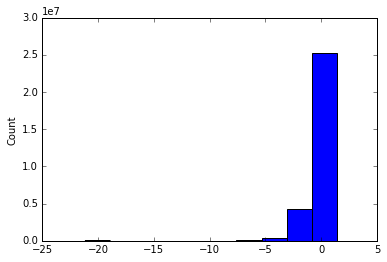

In [9]:
ax = betahat.value.plot()
plt.show(ax)

## The next step in the calculation...

In [10]:
# simplify the representation of betahat:
betahat.symbolic = '\\hat{{\\beta}}'

In [11]:
# sum betahat*temp across bins
mortality = (betahat * temp).sum(dim='bins')

# declare a symbol for mortality
mortality.symbol = 'M'

In [12]:
mortality.display()

<IPython.core.display.Latex object>

Note that the dimensionality of mortality is less than beta and temp in the LaTeX and data:

In [13]:
mortality.value

<xarray.DataArray (adm2: 24999, time: 100)>
array([[ -2.92124395e+00,  -1.99362992e+00,  -8.93652801e-01, ...,
          1.10621390e+00,   2.57830688e+00,  -2.29306181e+00],
       [ -1.38629855e+00,  -7.76493092e+00,   2.03159987e+00, ...,
         -3.41893630e+00,  -4.84213829e+00,  -2.45017356e+00],
       [  1.56519757e+00,  -2.41087398e-01,  -4.24496624e-01, ...,
          1.36587685e+00,  -5.93521188e-01,   2.76255544e+00],
       ..., 
       [ -3.31492736e+00,   6.77445891e-03,  -5.47755159e+00, ...,
         -6.10378895e+00,   3.93503051e+00,  -3.73371494e+00],
       [  3.06004915e+00,   2.91296446e+00,   3.59191665e+00, ...,
         -7.61977078e+00,   5.19491826e-01,  -1.90245230e+00],
       [ -7.99817007e+00,  -4.96106865e+00,   3.18680168e+00, ...,
         -8.19163235e+00,  -8.54668938e-01,  -8.54509732e-01]])
Coordinates:
  * adm2     (adm2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * time     (time) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 1

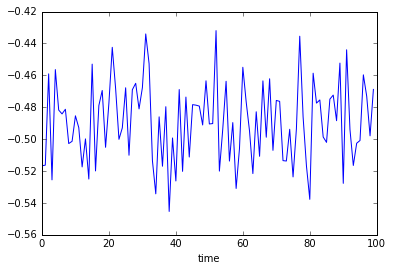

In [14]:
ax = mortality.value.mean(dim='adm2').plot()
plt.show(ax)